# Rainfall Weather Forecasting

In this problem statement we need to build two different models one is to predict the possibility of rain and another is to predict how much rainfall could be there.

## Loading the dataset

In [1]:
# importing required libraries
import pandas as pd   # for data wrangling
import numpy as np    # numerical python for linear algebra, handling arrays etc.
import matplotlib.pyplot as plt   # for data visualisation
import seaborn as sns             # for data visualisation
import warnings              # to detect unnecessary warnings
warnings.filterwarnings('ignore')   # this will filter and ignore unnecessary warnings

In [2]:
# loading the dataset
rainfall = pd.read_csv('rainfall_weather_forecasting.csv')

### Data Analysis

In [3]:
# first let's check the shape of dataset
rainfall.shape

(8425, 23)

*The dataset contains 8425 rows and 23 columns.*

In [4]:
# as we can see the dataframe has 23 colums, it may possible that it will not show all columns when we load the dataset
# to see all columns we need to set columns option
pd.pandas.set_option('display.max_columns', None)

In [5]:
# loading top 15 rows of dataset to take an overview of it
rainfall.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


#### Data Types

In [6]:
# checking data types of columns
rainfall.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

*Some column contains continuous data types while few contains object data types.*

#### Null Values

In [7]:
# checking for null values present in the dataset
rainfall.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

*Here we can see most of the column contains quite number of null values first we need to fill them then we will do the data visualization.*

#### Unique values

In [11]:
# Let's check for unique values present in each object data type column
# In the dataset we have few object column so we will make a list of object data type column
# we will use list concatenation to add object data type column in the list
obj = [i for i in rainfall.columns if rainfall[i].dtypes == 'O']

In [13]:
# now we will check for unique values using for loop 
for i in obj:
    uni = rainfall[i].nunique()
    print('There are', uni, 'unique values present in', i, 'column')

There are 3004 unique values present in Date column
There are 12 unique values present in Location column
There are 16 unique values present in WindGustDir column
There are 16 unique values present in WindDir9am column
There are 16 unique values present in WindDir3pm column
There are 2 unique values present in RainToday column
There are 2 unique values present in RainTomorrow column


*Here we can see there is one date column which contains date of the recording data and this will not give any insight to predict the output so we can drop this column. While other column contains 2 to 16 unique values.*

#### Filling the nan values

In [30]:
# first we will make a copy of the dataframe
df = rainfall.copy()

In [31]:
# we will fill the continuous column with mean and categorical column with mode
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir']  = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

*Now all null values are filled let's check*

In [32]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

*Here we can see all null values are filled. Now we can do the analysis of data.*

#### Statistical Summary

In [33]:
# checking statistical summary of continuous data
summ = df.describe()
summ

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


Observations:
    
    1: The minimum temperature is -2 of that particular area.
        
    2: Standard deviation is high of some data.
        
    3: The maximum rainfall is 371mm.
        
    4: There is a large difference between 75th percentile and maximum value in some columns but also there is high standard deviation so there is a less chance of outliers we will check for them.

#### Skewness

In [35]:
# checking for skewness in the numeric data
df.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

*Here we can observe that columns Rainfall and Evaporation contains high skewed data.*

#### Imbalance Check

In [38]:
# for one problem our target column is RainTomorrow i.e. classification so let's check if there is any imbalance in data
df['RainTomorrow'].value_counts(normalize = True)*100

No     76.367953
Yes    23.632047
Name: RainTomorrow, dtype: float64

*Here we can clearly see that there are more than 70% data is bends towards same type of variable so we need to balance this otherwise the model will get biased towards one side.*

### Data Visualization

*As we know we have to build two different models one is for classification another is for Regression so we will do the Data visualisation for both then we will build the model.*

#### Distribution of data

First let's check the distribution of data of numerical columns

In [39]:
# we will make a list of all numeric columns
# we will use list concatenation to do this
num = [i for i in df.columns if df[i].dtype != 'O']

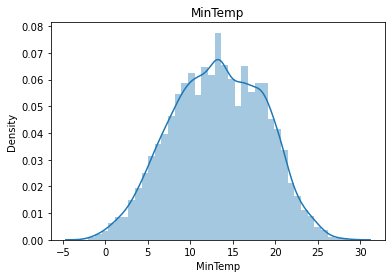

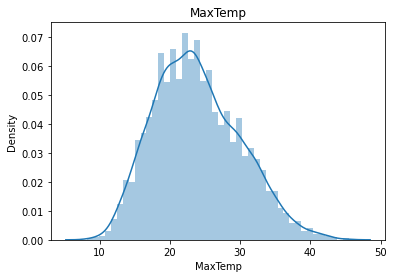

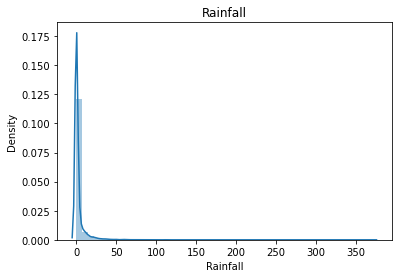

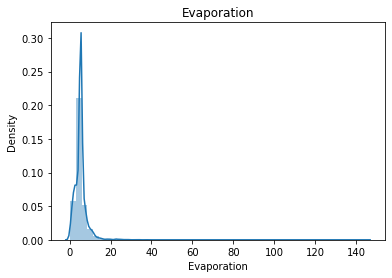

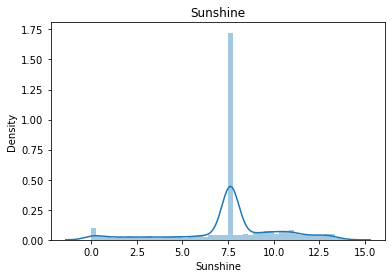

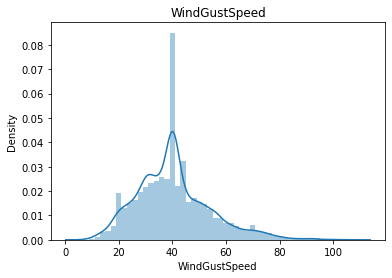

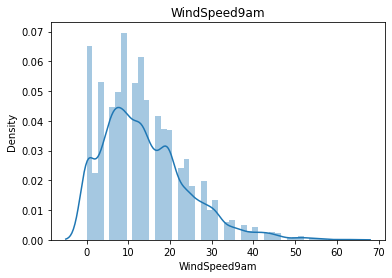

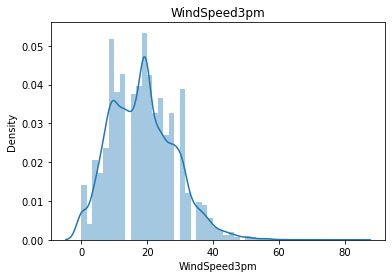

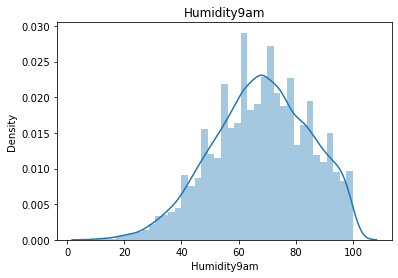

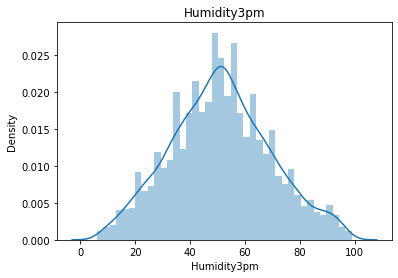

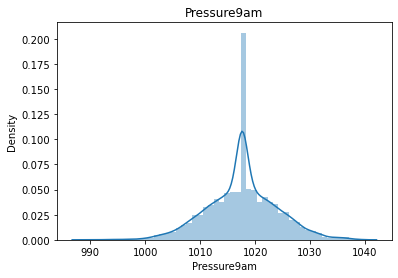

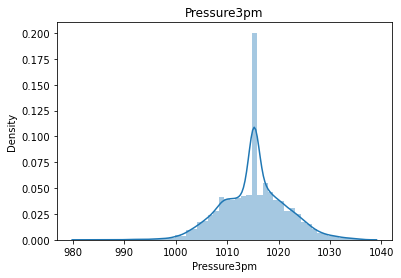

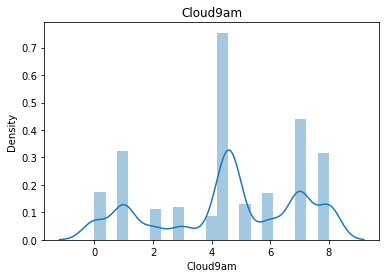

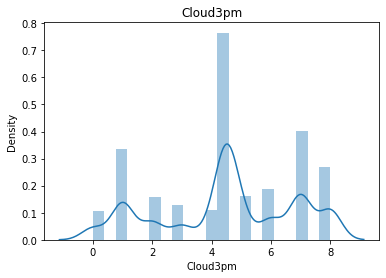

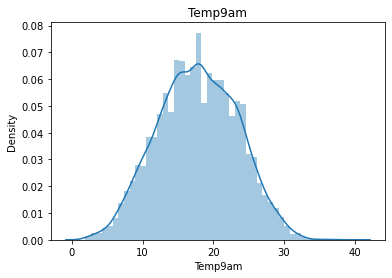

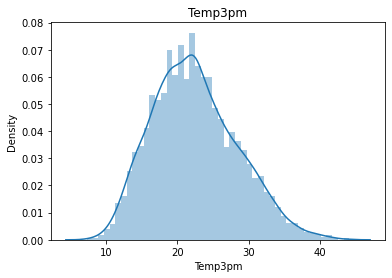

In [41]:
# we will use for loop to plot the graph and use distplot to check distribution of data
for i in num:
    plt.title(i)
    sns.distplot(df[i])
    plt.show()

*Here we can observe that some of the colmns contains slightly skewed data while some contains highly skewed data.*

#### Categorical features

In [43]:
# Let's check the frequency of unique categorical features
# first let's make a list of categorical columns
cat = [i for i in df.columns if df[i].dtype == 'O']

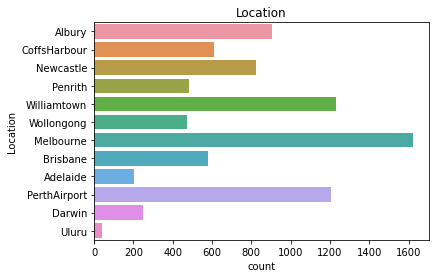

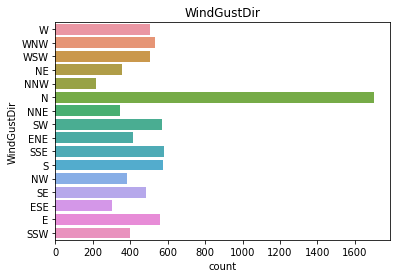

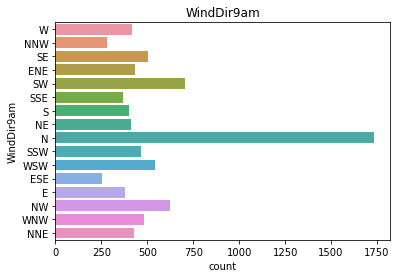

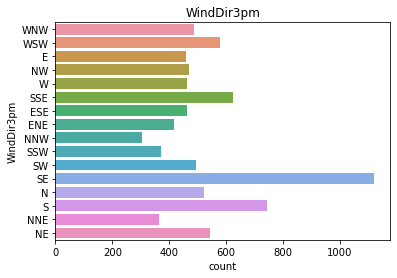

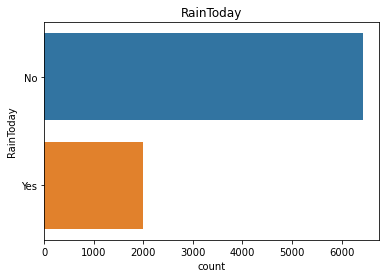

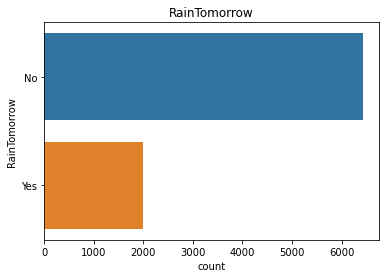

In [46]:
# we will use for loop to plot the graph and countplot to check the frequency
for i in cat[1:]:
    # here we have skipped the index 0 because it contains date of the data recorded
    plt.title(i)
    sns.countplot(y = i, data = df)
    plt.show()

Observations:
    
    1: Most of the data are recorded from Melbourne area.
        
    2: Most of the times direction of strongest wind is towards North.
        
    3: Most of the times wind direction at 9am is towards North.
        
    4: Most of the times wind direction at 3pm is towards SouthEast.
        
    5: Most of the times it did not Rain.
        
    6: Most times the forcast says it will not rain.

#### Relation of independent columns with target column.

Relation between Rain Forecast and MinTemp


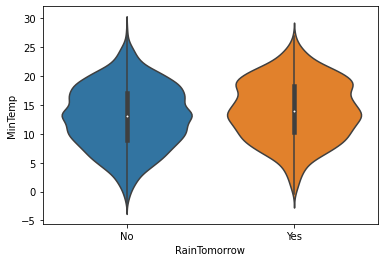



Relation between Rain Forecast and MaxTemp


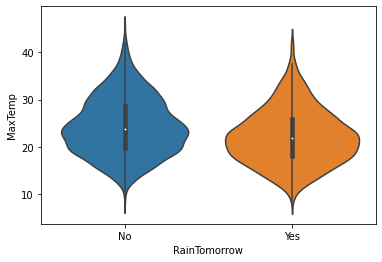



Relation between Rain Forecast and Rainfall


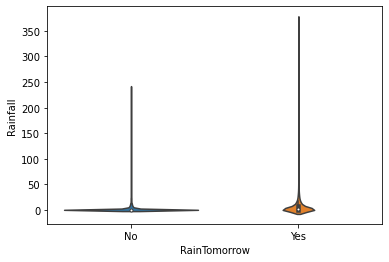



Relation between Rain Forecast and Evaporation


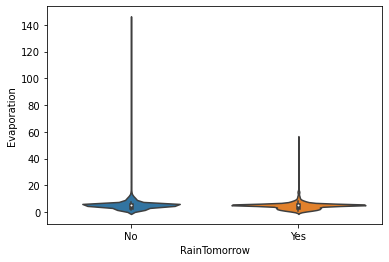



Relation between Rain Forecast and Sunshine


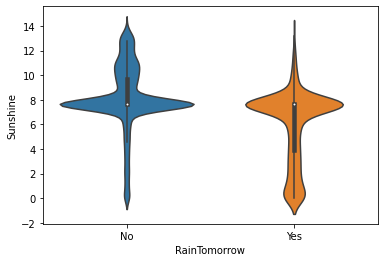



Relation between Rain Forecast and WindGustSpeed


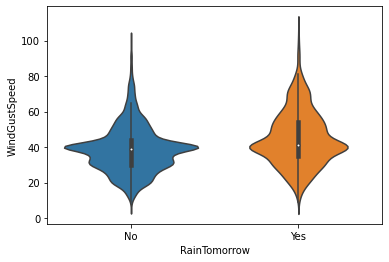



Relation between Rain Forecast and WindSpeed9am


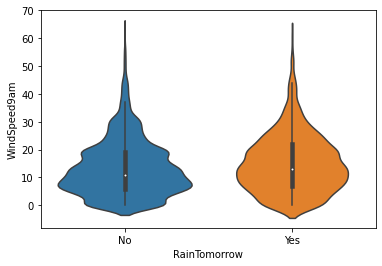



Relation between Rain Forecast and WindSpeed3pm


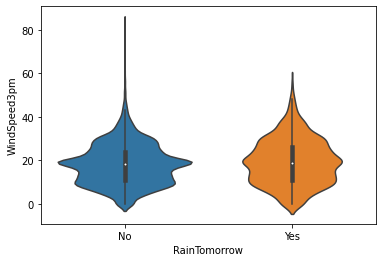



Relation between Rain Forecast and Humidity9am


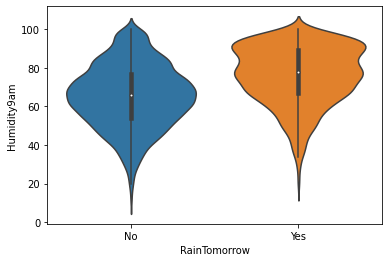



Relation between Rain Forecast and Humidity3pm


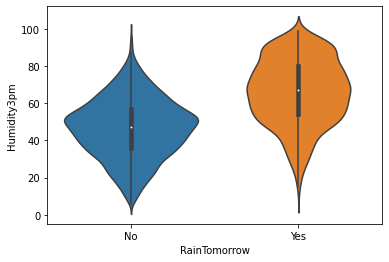



Relation between Rain Forecast and Pressure9am


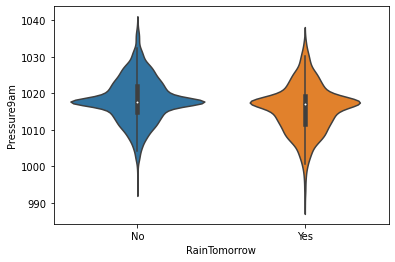



Relation between Rain Forecast and Pressure3pm


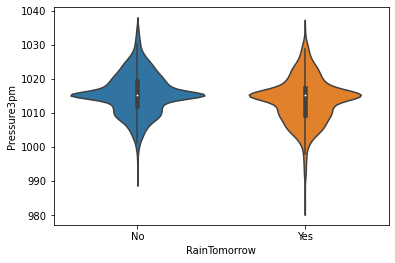



Relation between Rain Forecast and Cloud9am


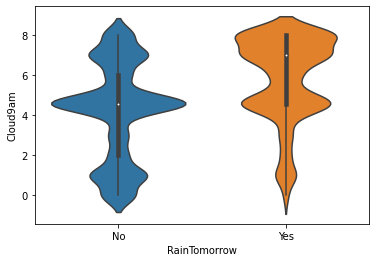



Relation between Rain Forecast and Cloud3pm


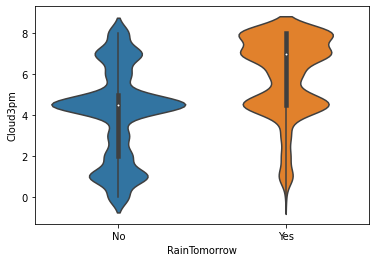



Relation between Rain Forecast and Temp9am


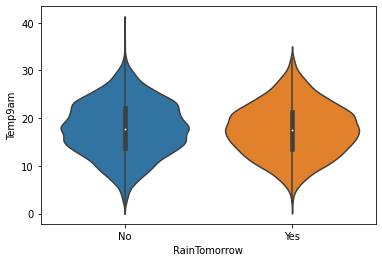



Relation between Rain Forecast and Temp3pm


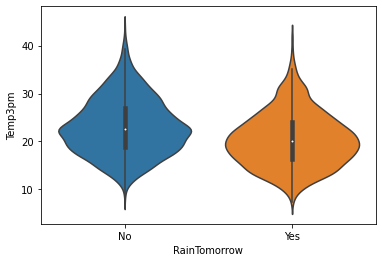

In [52]:
# first we will check the relationship of numeric columns with target column
# we will use violin plot for this
for i in num:
    print('Relation between Rain Forecast and', i)
    sns.violinplot(x = 'RainTomorrow', y = i, data = df)
    plt.show()
    print('\n')

Observations:
    
    1: The minimum temperature when rainfall forecast is yes is between 10 to 15 degree celcius. This is almost same when 
    there will no rainfall.
        
    2: Maximum temperature when rainfall forecast is yes is nearby 20 to 25 degree celcius.
        
    3: When rain forecast is yes then most of the time nearby 10mm rainfall happens.
        
    4: When rain forecast is yes then there are nearby 7 hours of sunshine in a day.
        
    5: When rain forecast is yes then there is more humidity in air.

#### Relation of Rainfall with other variables.

Relation between rainfall and MinTemp


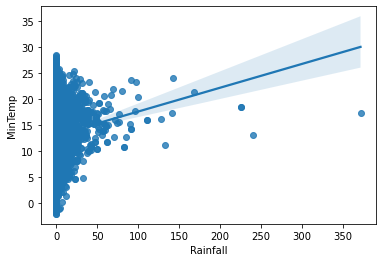

Relation between rainfall and MaxTemp


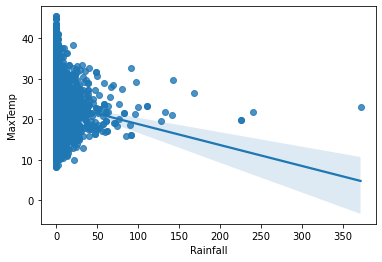

Relation between rainfall and Rainfall


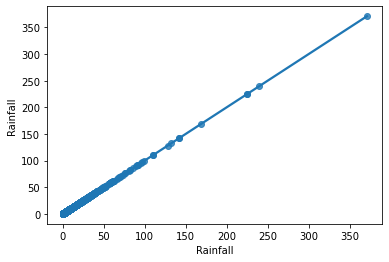

Relation between rainfall and Evaporation


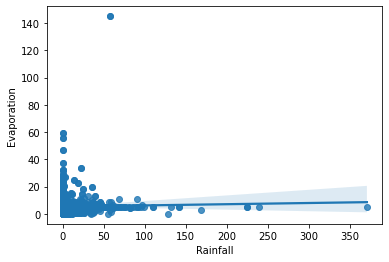

Relation between rainfall and Sunshine


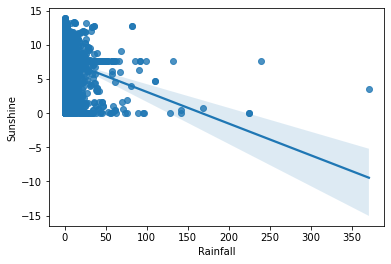

Relation between rainfall and WindGustSpeed


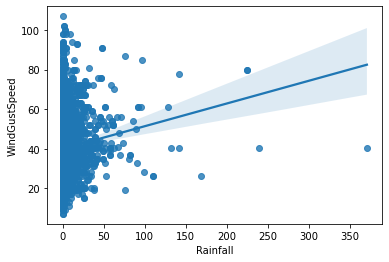

Relation between rainfall and WindSpeed9am


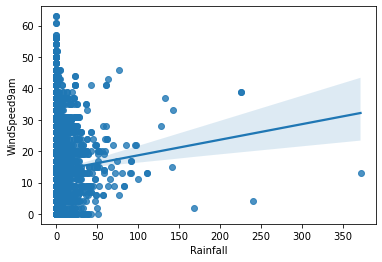

Relation between rainfall and WindSpeed3pm


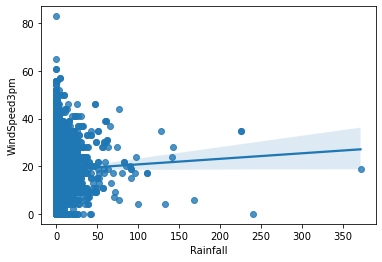

Relation between rainfall and Humidity9am


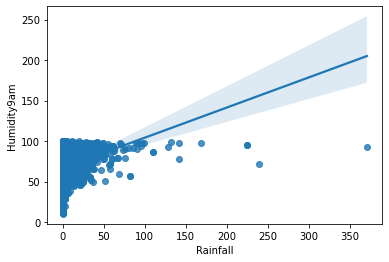

Relation between rainfall and Humidity3pm


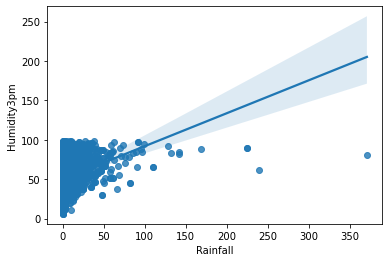

Relation between rainfall and Pressure9am


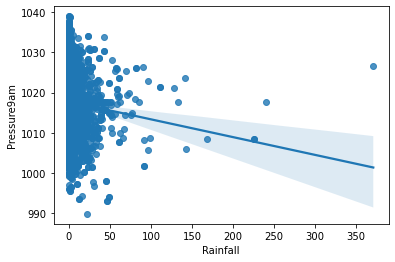

Relation between rainfall and Pressure3pm


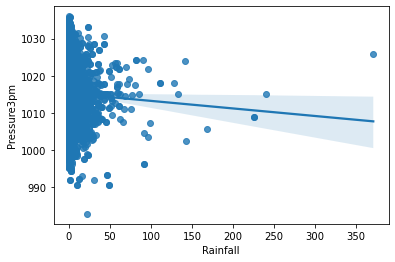

Relation between rainfall and Cloud9am


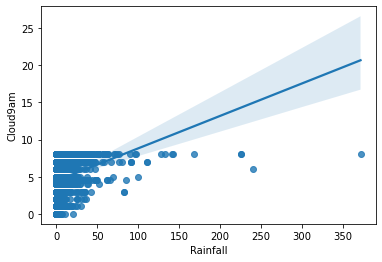

Relation between rainfall and Cloud3pm


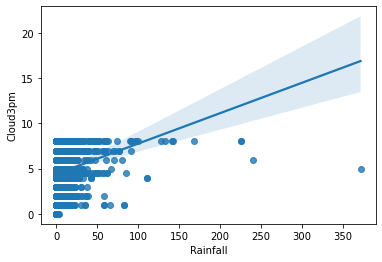

Relation between rainfall and Temp9am


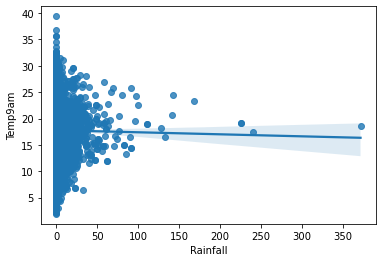

Relation between rainfall and Temp3pm


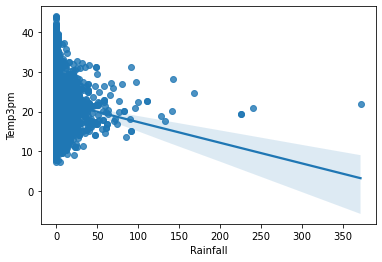

In [54]:
# we will use for loop to plot all graphs
# we will use regplot to show the relation
for i in num:
    print('Relation between rainfall and', i)
    sns.regplot(x = 'Rainfall', y = i, data = df )
    plt.show()

*Here we can see some data are showing positive relation with rainfall while some is showing some negative relation with rainfall. The data which is showing positive relation with rainfall means it may chance that there will me more quantity of rainfall will happen and the data which is showing negative relation with rainfall means there is less chance that more rainfall happen.*

#### Outliers

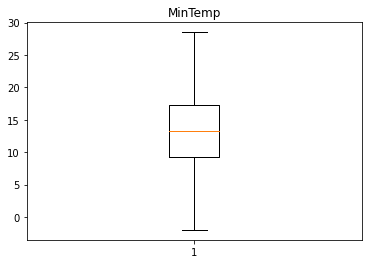

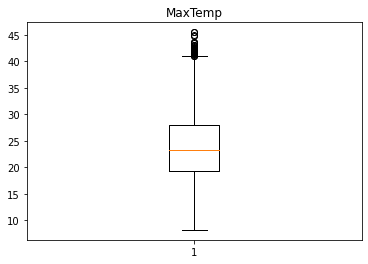

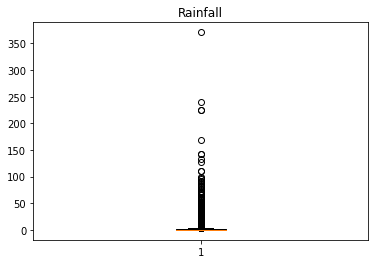

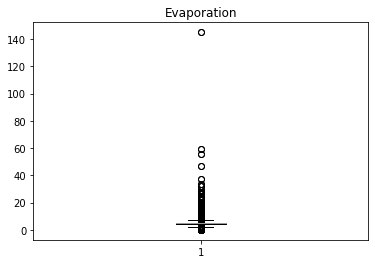

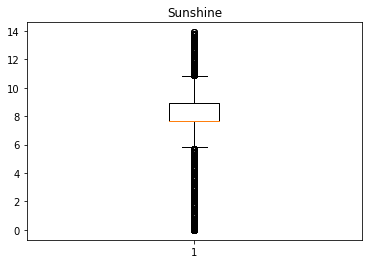

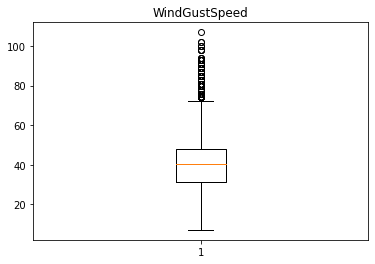

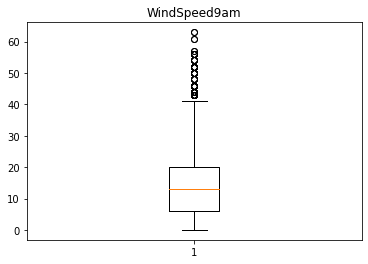

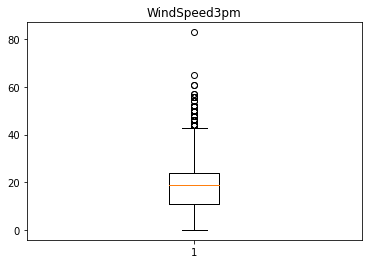

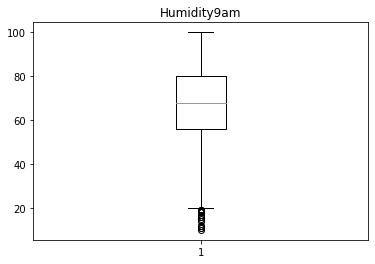

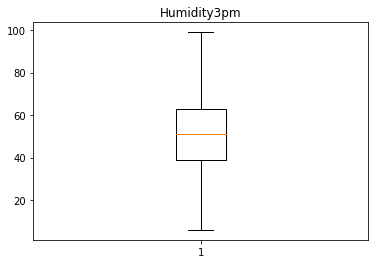

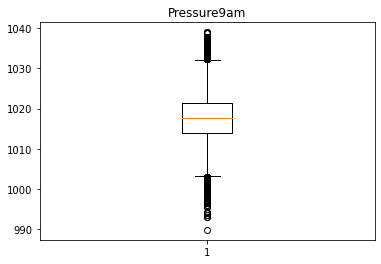

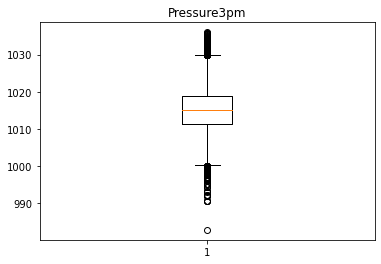

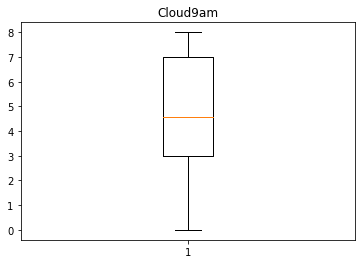

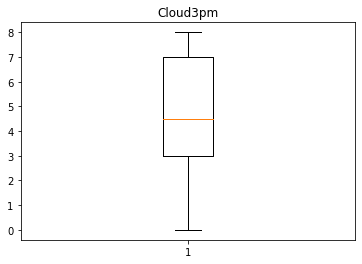

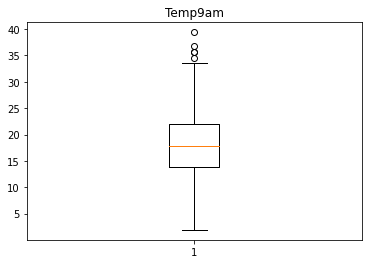

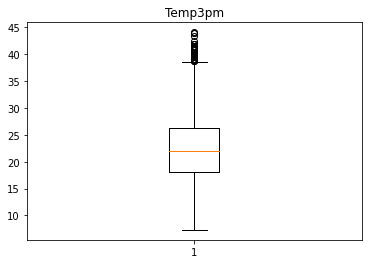

In [55]:
# let's check if there is some outlier in data
# we will use boxplot for this
for i in num:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

*Few column data is showing huge number of outliers. We will check for this later and treat them accordingly.*

### Feature Engineering

#### Encoding

In [57]:
# as we know there are few columns which contains categorical data so we will encode them.

# importing required library
from sklearn.preprocessing import LabelEncoder

# making instance of it
le = LabelEncoder()

In [59]:
# we will use for loop to encode the data
for i in obj:
    df[i] = le.fit_transform(df[i])

In [60]:
# our data is encoded let's load first 10 rows to check it
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
5,5,1,14.6,29.7,0.2,5.389395,7.632205,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,4.566622,4.503183,20.6,28.9,0,0
6,6,1,14.3,25.0,0.0,5.389395,7.632205,13,50.0,12,13,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.503183,18.1,24.6,0,0
7,7,1,7.7,26.7,0.0,5.389395,7.632205,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,4.566622,4.503183,16.3,25.5,0,0
8,8,1,9.7,31.9,0.0,5.389395,7.632205,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,4.566622,4.503183,18.3,30.2,0,1
9,9,1,13.1,30.1,1.4,5.389395,7.632205,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,4.566622,4.503183,20.1,28.2,1,0


*Here we can see the data is encoded.*

#### Correlation

Let's check the correlation of other data with our target.

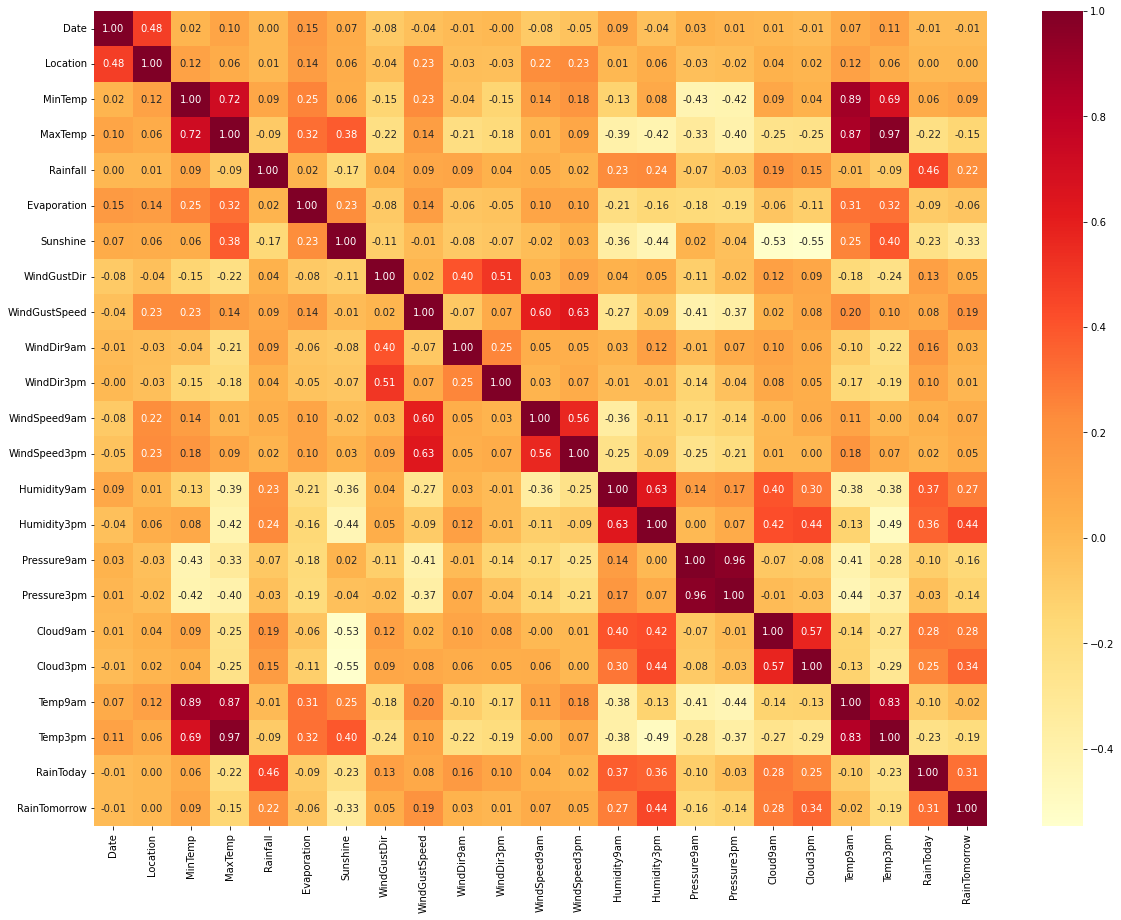

In [61]:
# we will use heatmap to check correlation
corr = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'YlOrRd')
plt.show()

Observations:
    
    1: Humidity, WindSpeed, and cloud are more correlated with RainForecast.
 
    2: If there is rain happens today then it gives more insight to forecast.
    
    3: Pressure at 9am and 3pm are highly correlated with each other.
        
    4: Humidity and Cloud is more correlated with total amount of rainfall.

#### Dropping column

In [62]:
# as we know there is a date column which is the date on which the data is recorded and it will not provide ay big insight to 
# the model so dropping that column

# first we will make a copy of the dataframe and do all the feature engineering tasks on that
df1 = df.copy()

In [64]:
# dropping date column
df1.drop('Date', axis = 1, inplace = True)

*The date column is dropped now.*

#### Outliers

In [66]:
# importing library to calculate zscore
from scipy.stats import zscore

In [67]:
# finding zscore values of all data
z = np.abs(zscore(df1))

In [69]:
# checking the threshold value greater than 3 and holding them into pandas dataframe in a variable outlier
threshold = 3
outlier = pd.DataFrame(np.where(z>threshold))

In [72]:
# Checking shape of all data which contains outlier
outlier.shape[1]

544

*There are total 544 rows which contains outliers somewhere in data.*

In [80]:
# removing outliers from data
df_1 = df1[(z<threshold).all(axis = 1)]

In [83]:
# checking new dataframe shape
df_1.shape

(7987, 22)

In [84]:
# old dataframe shape
df1.shape

(8425, 22)

In [85]:
# checking data loss
data_loss = ((8425-7987)/7984)*100
data_loss

5.485971943887775

*There is 5% data loss after outlier removal and it is in accptable range so we can go for it.*

#### Over Sampling

As we have already seen there is imbalance in our data so we will balance that using over sampling technique.

In [87]:
# importing required library
from imblearn.over_sampling import SMOTE

# making instance of it
smt = SMOTE()

In [88]:
# Splitting data into input and output and holding them into x and y variables respectively
x = df_1.iloc[ : , :-1]
y = df_1.iloc[ : , -1]

In [93]:
# checking shape of input and target data
print('Input data shape', x.shape)
print('Target data shape', y.shape)

Input data shape (7987, 21)
Target data shape (7987,)


In [94]:
# now passing input and target data for balancing the dataset
x_in, y_out = smt.fit_resample(x,y)

*Now the dataframe is balanced.*

In [95]:
# checking shape of input and target data after doing oversampling
print('Input data shape', x_in.shape)
print('Target data shape', y_out.shape)

Input data shape (12330, 21)
Target data shape (12330,)


In [96]:
# checking the values of different variables
y_out.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

*Now here we can see there is equal number of both variables as it is created synthetic samples of data.*

#### Skewness

In [99]:
# checking skewness of input data
x_in.skew()

Location        -0.028148
MinTemp         -0.088488
MaxTemp          0.362915
Rainfall         2.792217
Evaporation      0.846003
Sunshine        -0.653485
WindGustDir      0.112290
WindGustSpeed    0.466685
WindDir9am       0.189431
WindDir3pm      -0.106070
WindSpeed9am     0.627686
WindSpeed3pm     0.256395
Humidity9am     -0.396688
Humidity3pm     -0.027631
Pressure9am      0.047555
Pressure3pm      0.082911
Cloud9am        -0.548958
Cloud3pm        -0.509319
Temp9am          0.002431
Temp3pm          0.394192
RainToday        1.059174
dtype: float64

*Some columns contains skewed data more than the accptable range we will try to handle that.*

In [100]:
# importing library to handle the distribution of data
from sklearn.preprocessing import PowerTransformer

In [101]:
# making instance of it
pt = PowerTransformer()

In [102]:
# passing input data to transform
new_x = pt.fit_transform(x_in)
# this will provide output in numpy array format

# holding the output in pandas dataframe
in_x = pd.DataFrame(new_x, columns = x_in.columns)

In [103]:
# checking skewness of new data
in_x.skew()

Location        -0.168815
MinTemp         -0.096571
MaxTemp         -0.011324
Rainfall         0.564385
Evaporation      0.078316
Sunshine        -0.123283
WindGustDir     -0.175659
WindGustSpeed   -0.001942
WindDir9am      -0.139548
WindDir3pm      -0.226284
WindSpeed9am    -0.119050
WindSpeed3pm    -0.095498
Humidity9am     -0.098498
Humidity3pm     -0.064631
Pressure9am     -0.000755
Pressure3pm      0.000000
Cloud9am        -0.300642
Cloud3pm        -0.252613
Temp9am         -0.049934
Temp3pm         -0.010815
RainToday        1.059174
dtype: float64

*Here we can see the skewness is now come in acceptable range.*

#### Scaling the data

In [107]:
# we will use standard scaler to scale our data

# importing require library
from sklearn.preprocessing import StandardScaler

# holding it into an instance
ssc = StandardScaler()

In [108]:
# applying scaling to input data
scaled = ssc.fit_transform(in_x)

# this will give output in numpy array format 

# making pandas dataframe of output
input_x = pd.DataFrame(scaled, columns = in_x.columns)

*Now data is scaled and it is ready for the model training.*

### Model Building -- Classification Problem

In [110]:
# importing classification algorithms and validation matrics

from sklearn.model_selection import train_test_split   # to split the data for training and testing

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
# making instance of every model
lreg = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

#### Random State

In [112]:
# first we will find the best random state to split our data

max_acc = 0
# making a variable max_acc and initialising it with 0 we will store the maximum accuracy in it
best_rs = 0
# making a variable best_rs and initialising it with 0 we will store the best random state in it for which maximum accuracy is 
# achieved

# using a for loop to split data into 100 different random states
for i in range(1,101):
    x_train, x_test, y_train, y_test = train_test_split(input_x, y_out, test_size = 0.25, random_state = i )
    # taking 25% data for testing
    
    # training Logistic Regression model
    lreg.fit(x_train, y_train)
    
    # making prediction on test data
    pred = lreg.predict(x_test)
    
    # checking accuracy
    accuracy = accuracy_score(pred, y_test)
    
    print('At random state', i, 'accuracy score is', accuracy)
    
    
    # using if condition to store the best accuracy and random state
    if accuracy>max_acc:
        max_acc = accuracy
        best_rs = i
    
print('Maximum accuracy is', max_acc,'and best random state is', best_rs)

At random state 1 accuracy score is 0.7992215374635095
At random state 2 accuracy score is 0.7927343496594227
At random state 3 accuracy score is 0.7833279273434965
At random state 4 accuracy score is 0.7839766461239053
At random state 5 accuracy score is 0.7830035679532923
At random state 6 accuracy score is 0.7875445994161531
At random state 7 accuracy score is 0.7885176775867662
At random state 8 accuracy score is 0.7784625364904314
At random state 9 accuracy score is 0.7924099902692183
At random state 10 accuracy score is 0.7907881933181966
At random state 11 accuracy score is 0.7911125527084009
At random state 12 accuracy score is 0.778138177100227
At random state 13 accuracy score is 0.7885176775867662
At random state 14 accuracy score is 0.7956535841712618
At random state 15 accuracy score is 0.7843010055141096
At random state 16 accuracy score is 0.7979240999026922
At random state 17 accuracy score is 0.7992215374635095
At random state 18 accuracy score is 0.7843010055141096
At

*The logistic regression model is giving 80% accuracy which is maximum at random state 59. We will split the data at random state 59.*

#### Data Splitting

In [113]:
# splitting the data at random state 59
x_train, x_test, y_train, y_test = train_test_split(input_x, y_out, test_size = 0.25, random_state = 59)
# taking 25% of data for testing

In [114]:
# checking testing and training data shape
print('Input training data shape:', x_train.shape)
print('Target training data shape:', y_train.shape)
print('Input test data shape:', x_test.shape)
print('Target test data shape:', y_test.shape)

Input training data shape: (9247, 21)
Target training data shape: (9247,)
Input test data shape: (3083, 21)
Target test data shape: (3083,)


#### Model Selection

In [115]:
# Now we will train different classification models and check the accuracy score of all models then select the best model

# making a list of all models
model = [lreg, svc, dtc, knn, rfc, gnb]

# using for loop to train all models

for model in model:
    model.fit(x_train, y_train)
    
    # making predictions
    pred = model.predict(x_test)
    
    # checking accuracy score
    accuracy = accuracy_score(pred, y_test)
    
    # confusion matrix
    cnf_matrix = confusion_matrix(pred, y_test)
    
    # classification report
    clf_report = classification_report(pred, y_test)
    
    print('Evaluation of model', model,':')
    print('Accuracy score:', accuracy)
    print('Confusion matrix:\n', cnf_matrix)
    print('Classification report\n', clf_report)
    print('\n\n')

Evaluation of model LogisticRegression() :
Accuracy score: 0.8050600064871878
Confusion matrix:
 [[1252  324]
 [ 277 1230]]
Classification report
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1576
           1       0.79      0.82      0.80      1507

    accuracy                           0.81      3083
   macro avg       0.81      0.81      0.81      3083
weighted avg       0.81      0.81      0.81      3083




Evaluation of model SVC() :
Accuracy score: 0.8621472591631528
Confusion matrix:
 [[1297  193]
 [ 232 1361]]
Classification report
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1490
           1       0.88      0.85      0.86      1593

    accuracy                           0.86      3083
   macro avg       0.86      0.86      0.86      3083
weighted avg       0.86      0.86      0.86      3083




Evaluation of model DecisionTreeClassifier() :
Accuracy score

*Here we can observe that all models are giving quite good accuracy for prediction except GaussianNB and from all models RandomForest is giving highest accuracy of 93% so we will select this model for final training.*

#### Final Model Training

In [116]:
# sending data to the best model for training
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [117]:
# making predictions on test data
pred = rfc.predict(x_test)

In [118]:
# checking accuracy score
print('Accuracy score:', accuracy_score(pred, y_test))

Accuracy score: 0.9322088874472916


*Model accuracy is 93%.*

In [119]:
# checking confusion matrix
print('Confusion matrix:\n', confusion_matrix(pred, y_test))

Confusion matrix:
 [[1422  102]
 [ 107 1452]]


*The model is predicting very well as it has very less data at false positive and false negative.*

In [120]:
# checking cassification report
print('Classification report:\n', classification_report(pred, y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1524
           1       0.93      0.93      0.93      1559

    accuracy                           0.93      3083
   macro avg       0.93      0.93      0.93      3083
weighted avg       0.93      0.93      0.93      3083



*The overall model accuracy is 93%.*

### Model Evaluation

#### Cross validation

In [122]:
# importing required model
from sklearn.model_selection import cross_val_score

In [123]:
# using for loop to split data at different cross folds
for i in range(2,20):
    score = cross_val_score(rfc, input_x, y_out, cv = i )
    mean_score = score.mean()
    print('At cross fold', i,'mean score is', mean_score)

At cross fold 2 mean score is 0.7030819140308191
At cross fold 3 mean score is 0.7357664233576643
At cross fold 4 mean score is 0.7804591043008033
At cross fold 5 mean score is 0.8326034063260341
At cross fold 6 mean score is 0.7889699918897
At cross fold 7 mean score is 0.8469785278884047
At cross fold 8 mean score is 0.8704133599470083
At cross fold 9 mean score is 0.8795620437956205
At cross fold 10 mean score is 0.8937550689375506
At cross fold 11 mean score is 0.8709687112619761
At cross fold 12 mean score is 0.8978320590489975
At cross fold 13 mean score is 0.9096685761229385
At cross fold 14 mean score is 0.907706248065215
At cross fold 15 mean score is 0.9074614760746147
At cross fold 16 mean score is 0.9125821163272525
At cross fold 17 mean score is 0.905554233092496
At cross fold 18 mean score is 0.9020275750202758
At cross fold 19 mean score is 0.9190570087834434


*Starting at less cross folds the mean score was slightly less than the accuracy score but as the cross fold increases the difference between mean score and accuracy score of the model was decreased that was acceptable and we can say the model is performing well.*

#### Hyperparameter tuning

Let's do hyperparameter tuning of model to see whether it's performance increases or not.

In [124]:
# importing required library
from sklearn.model_selection import GridSearchCV

In [125]:
# making a dictionary of parameters
params = {'n_estimators':[100,200,300,400,500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}

# making instance for tuning and passing model and parameters
gsv = GridSearchCV(rfc, params)

In [126]:
# sending data for training at different parameters
gsv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [127]:
# finding best parameter and that accuracy
print('Best Parameter:', gsv.best_params_)
print('Best score:', gsv.best_score_)

Best Parameter: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 400}
Best score: 0.9230014763275985


*At best parameters the highest accuracy is 92% which is less than the model accuracy. So, we will save the initial model.*

#### AUC_ROC Curve

In [129]:
# importing required libraries for it
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [130]:
# using predict_proba function for model RandomForestClassifier to predict the occurance of 1
y_pred_prob = rfc.predict_proba(x_test)[:,1]

In [131]:
# now we will use these predicted probability to find fpr (false positive rate), tpr (True Positive rate) and threshold values

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

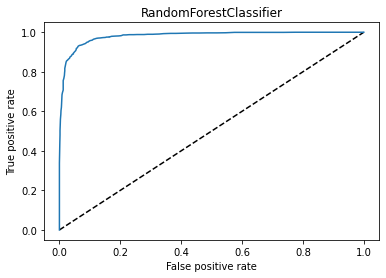

In [132]:
# making auc_roc curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.title('RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

*This is showing AUC_ROC curve of the model.*

In [133]:
# checking roc_score
score = roc_auc_score(y_test, rfc.predict(x_test))
score

0.9321912775150185

### Saving the best model

In [135]:
# importing library
import pickle

In [136]:
filname = 'weather_forecast.obj'

In [138]:
pickle.dump(rfc, open(filname, 'wb'))

*Now the model is saved.*

### Loading the model

In [139]:
forecast = pickle.load(open('weather_forecast.obj', 'rb'))

In [140]:
# making prediction on test data
pred = forecast.predict(x_test)

In [142]:
# checking accuracy score
acc = accuracy_score(pred, y_test)
acc

0.9322088874472916

In [143]:
# making dataframe of predictions
pd.DataFrame([forecast.predict(x_test)[:], y_test[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

*Here from the dataframe we can see the model is predicting very well it is slightly making any mistakes.*

# Regression Model

I have tried to build the regression model but not able to build that. The model I build some is giving the score in negative while some is not giving the accuracy more than 50%. I am not able to understand where I am making mistake to do it.